In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv


## Dickey Fuller Test
Dicker fuller test use autoregressive model and optimize an information criterion across multiple different lag values. <br>
This test is a statistical test to check for stationarity in time series. This is a type of unit root test, through which we find if the time series is having any unit root.
<br>
### Unit Root
is a feature of time series that indicate any stochastic trend in the time series that drives it away from mean value. Presence of unit root makes the time series not stationary.
<br>
There are three main versions of Dickey-Fuller test with slightly different regression models:
1. **Dickey-Fuller Test**,assume no itercept or trend in the data.
2. **Dickey-Fuller with intercept**, adds an intercept term(constant value) to the model.
3. **Augmented Dickey-Fuller (ADF)**, extension of Dickey-Fuller that includes lagged differences of the dependent variable to account for autocorrelation

<div style="font-size: 1.5em;">
Stationarity is a very important step in ARIMA. The first step is to determine the number of differences required to make the series stationary because the model cannot forecast on non-stationary data.
</div>


$$
\LARGE
\Delta y_{t} = \mu + \delta y_{t-1} + \varepsilon_{t}
$$


<br> <br>
where:<br>
$\mu$: Constant<br>
$\delta$: Coefficient +<br>
$y_{t-1}$: Value in the time lag of 1 <br>
$\varepsilon$: Error component <br> 

The formula is like this: <br>

$$
\LARGE
\begin{array}{c}
t_{\hat{\delta}} = \frac{\hat{\delta}}{SE(\hat{\delta})}
\end{array}
$$
<br>



## Augmented Dickey Fuller Test
Extension of the normal Dickey-Fullter test for more complex model than AR(1). ADF used for larger sized set of time series models which can be more complicated.
<br>
This test under the following assumption: <br>
1. **Null Hypothesis $(H_{0})$:** There exists a unit root in the time series and it is non-stationary. **Unit root = 1** or **$\delta=0$**.
2. **Alternate Hypothesis $(H_{1})$:** There exist no unit root in the time series and it is stationary. **Unit root < 1** or **$\delta<0$**.

## Condition to reject H0 and accept H1
If the test statistic is less thanthe critical value or if the p-value is less than pre-specified significance level (ex:0.05), then the null hypothesis is rejected and the time series is considered stationary. <br>
If the test is greater than the critical value, the null hypothesis can't be rejected thus making the time series non-stationary. <br>
Critical value found from the Dicker Fuller table (similar to t-table used for t-test)

## Interpreting ADF test Results
- **Hypothesis**: either null hypothesis or alternate hypothesis.
- ADF give p-value and critical values at different significance levels (like 1% or 5%)
- Interpreting p value: A low p-value(less than the chosen significance level) means rejecting the null hypothesis thus the data is likely stationary.
- Interpreting test statistics: The test is negative, the more negative the stronger evidence against the null nypothesis (stronger evidence for stationarity).

## ADF Test using Python

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df.shape

(2956, 7)

In [5]:
# For this test we'll only be using the Date and Close Columns for simplicity
df = df[['Date', 'Close']]

In [6]:
df.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Close   2956 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.3+ KB


In [8]:
# Already in right format, what do i need to do is only turn the date into index
df.index = df['Date']

In [9]:
del df['Date']

In [10]:
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [11]:
#I think i need to trim this data
df = df.head(500)

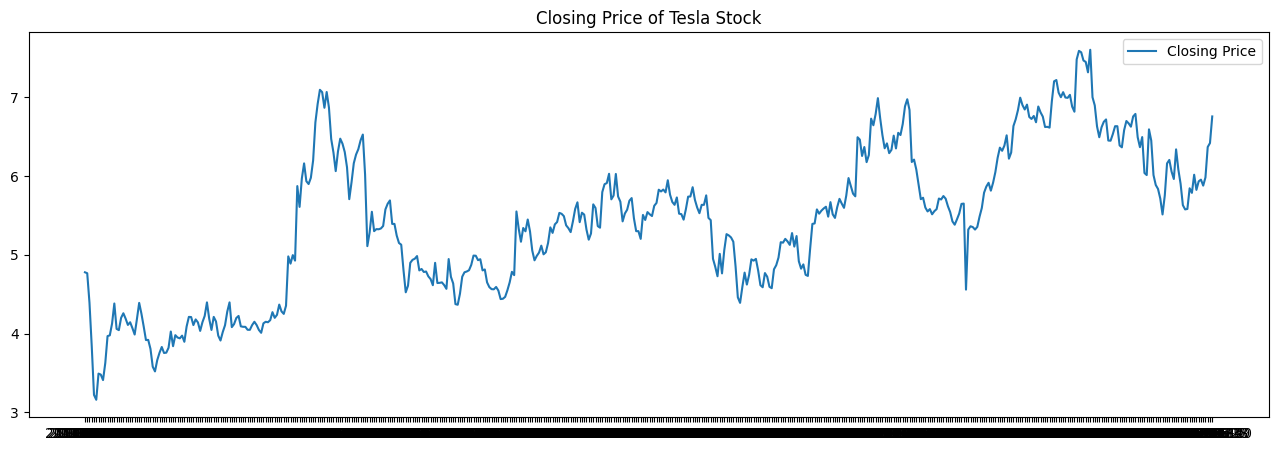

In [12]:
plt.figure(figsize=(16,5))
plt.plot(df.index, df['Close'], label = "Closing Price")
plt.legend(loc='best')
plt.title("Closing Price of Tesla Stock")
plt.show()

## The test

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adf_test(timeseries):
    print('Result of Augmented Dickey-fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [15]:
adf_test(df['Close'])

Result of Augmented Dickey-fuller Test
Test Statistic                  -2.212328
p-value                          0.201802
#Lags Used                       0.000000
Number of Observations Used    499.000000
Critical Value (1%)             -3.443523
Critical Value (5%)             -2.867350
Critical Value (10%)            -2.569864
dtype: float64


## Explanation
Test statistics is not less negative than any of the critical value, thus we can't reject the null hypothesis of a unit root in the data. Meaning The data might be non-stationary <br><br>
Let's say we are using significance level 0.05, the p-value is greater than the significance level thus can't reject the the null hypthesis. Meaning the data might not be stationary.
<br><br>
The lags is 0 because im using autolag 'AIC', the test might consider adding the lagged value of the dependent variable in the regression does not significantly improve the model fit.
